# Execute the code below

In [102]:
import pandas as pd
import numpy as np
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
from datetime import datetime

## You have now a DataFrame with lots of weather data

In [103]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5


# Now, complete the following tasks :
# Let's go in the deep !

## 1 - Merge
OK, you know very well the previous dataset. Now, you want more, much more. Another year for example ?

But it's too bad. The year 2018 is not in the good  shape. There are 2 files :
- The main file with Temperature, etc...
- The opinion file, with especially the Opinion

The goal is [to merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) both files in one DataFrame called **df2018**. It seems both files have a date column with the same format (but not the same name). 

Think about checking if both datasets have the same length. If they don't, what kind of merge do you have to do to keep each date of the main dataset ? Then apply this specific merge. 

In [104]:
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


In [105]:
print(df_main.shape)
print(df_opinion.shape)

(365, 15)
(341, 6)


In [106]:
# Your code here :
df2018 = pd.merge(df_main ,
                  df_opinion, 
                  how="left", 
                  left_on='DATE',
                  right_on='date')
print(df2018.shape)
df2018

(365, 21)


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,2018-01-01,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,2018-01-02,122.0,0.0,3.0,3.3,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,2018-01-03,122.0,0.0,3.0,3.3,bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,2018-01-04,116.0,0.0,3.0,3.3,bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,2018-01-05,116.0,0.0,3.0,6.9,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,2018-12-27,119.0,0.0,1.0,8.7,very bad
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,2018-12-28,113.0,0.0,1.0,8.7,very bad
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,2018-12-29,116.0,0.0,1.0,8.7,very bad
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,2018-12-30,143.0,0.0,1.0,3.3,very bad


### Result

Your DataFrame **df2018** should now have 21 columns and 365 rows. If not, try again.

**Be careful:** 
- if you've renamed your `date` column, then merged both DataFrames with `on` parameter, Pandas kept only one `DATE` column. So you'll have 20 columns in your DataFrame. And you can skip the "drop" step just after.
- if you merged with `left_on` and `right_on` parameters, Pandas kept both columns `DATE` and `date`, and you'll have 21 columns in your DataFrame. You can do this "drop" step:



In [107]:
# You should now probably drop the "date" column. 
# This column is incomplete, it were provided from the opinion file. 
# It was very useful to perform the "merge". But we don't need it anymore.

# Read and execute the code below :
df2018.drop('date',             # Select column to drop
            axis = 1,           # Precise if you want to drop a column (1) or a row (0)
            inplace = True)     # If we don't use this argument, result is not stored

In [108]:
df2018.shape

(365, 20)

Now, everybody should have a 20 columns and 365 rows.

**Ohhhh, there are some missing values, we have to fill them. That will be the goal of this quest: to learn how to fill in the missing values, column by column, with different techniques.**

In [109]:
# Just execute the code below, to display a "non-null" column :
print("My DataFrame shape is : ", df2018.shape, end = '\n\n\n\n')
print('Which columns have missing values ? (Non-null column)')
print(df2018.info())


My DataFrame shape is :  (365, 20)



Which columns have missing values ? (Non-null column)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEW

### Find and display the Dates of missing values.
You can help you with the method `.isna()`

You have to find 24 different dates.

In [110]:
# Your code here :
print(df2018[df2018["WEATHER_CODE_EVENING"].isna()== True])

           DATE  MAX_TEMPERATURE_C  ...  SUNHOUR  OPINION
18   2018-01-19                 10  ...      NaN      NaN
31   2018-02-01                  8  ...      NaN      NaN
66   2018-03-08                 13  ...      NaN      NaN
100  2018-04-11                 15  ...      NaN      NaN
118  2018-04-29                 10  ...      NaN      NaN
143  2018-05-24                 23  ...      NaN      NaN
152  2018-06-02                 23  ...      NaN      NaN
163  2018-06-13                 20  ...      NaN      NaN
165  2018-06-15                 19  ...      NaN      NaN
175  2018-06-25                 25  ...      NaN      NaN
184  2018-07-04                 25  ...      NaN      NaN
191  2018-07-11                 23  ...      NaN      NaN
194  2018-07-14                 28  ...      NaN      NaN
197  2018-07-17                 23  ...      NaN      NaN
204  2018-07-24                 29  ...      NaN      NaN
220  2018-08-09                 20  ...      NaN      NaN
225  2018-08-1

## 2 - Before filling missing values, you have to create a new axis "flag", to document and to remember which lines you modify.

In [111]:
# Just execute the code below :
df2018['flag'] = df2018['OPINION'].isna()
df2018['flag'].value_counts()

False    341
True      24
Name: flag, dtype: int64

## 3 - Visualize and Fill the NaN

### 3.1 - First column : WEATHER_CODE_EVENING

You have to visualize how are the well-filled data. Of course you know Matplotlib, and maybe, you know Seaborn and Plotly. But, did you know that Pandas integrate directly some parts of Matplotlib ? It's very useful, and don't need to import other libraries...

#### Scatterplot directly with Pandas

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


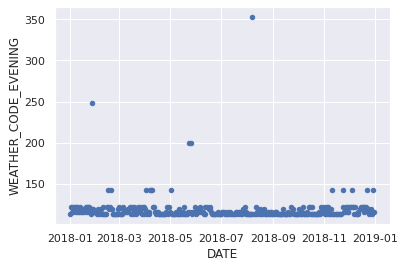

In [112]:
# Draw a scatterplot with Date on X-axis and WEATHER_CODE_EVENING on Y-axis
df2018['DATE']=pd.to_datetime(df2018['DATE'])
df2018.plot.scatter(x = 'DATE',
                    y = 'WEATHER_CODE_EVENING') #Code to complete

#### Boxplot directly with Pandas

Here you can find [a little help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

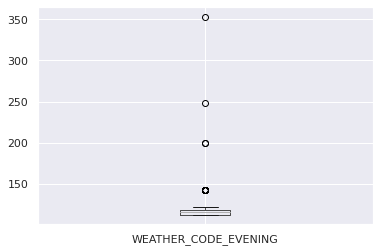

In [113]:
# Find a way to draw directly with pandas a boxplot on the column WEATHER_CODE_EVENING
df2018.boxplot('WEATHER_CODE_EVENING')

#### Deciles

Here you can find [a little help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html)

In [114]:
# Find a way to print the 9 deciles + min + max of the column WEATHER_CODE_EVENING with the quantile method of pandas and a loop
for dec in [x/10 for x in range(0,11,1)]:
  val = df2018['WEATHER_CODE_EVENING'].quantile(q=dec)
  print('q=', dec,':', val)

q= 0.0 : 113.0
q= 0.1 : 113.0
q= 0.2 : 113.0
q= 0.3 : 113.0
q= 0.4 : 113.0
q= 0.5 : 116.0
q= 0.6 : 116.0
q= 0.7 : 119.0
q= 0.8 : 122.0
q= 0.9 : 122.0
q= 1.0 : 353.0


#### Fill values
OK it seems that the most of datas are between 113 and 122. Maybe, we could fill the missing values with Mean or Median, it's up to you to choose. So you need :
- Calculate the mean or the median
- Fill the missing values only for **WEATHER_CODE_EVENING** with the `fillna()` method 

When you're OK, remember tu use the `inplace=True` argument, otherwise, your modification will not be stored.

In [115]:
# Hop ! Your code here :

mean_weather_column = df2018['WEATHER_CODE_EVENING'].mean()     #You have to complete this
df2018['WEATHER_CODE_EVENING'].fillna(mean_weather_column, 
                                      inplace = True) # When you are OK, you can replace this argument by True
df2018['WEATHER_CODE_EVENING'].value_counts()

113.000000    154
116.000000     78
122.000000     59
119.000000     34
118.507331     24
143.000000     12
200.000000      2
353.000000      1
248.000000      1
Name: WEATHER_CODE_EVENING, dtype: int64

In [116]:
# You can use this code to check how many missing values you have :
column_name = 'WEATHER_CODE_EVENING'
print("I have " ,df2018[column_name].isna().sum(), "missing values in the column", column_name)

I have  0 missing values in the column WEATHER_CODE_EVENING


### 3.2 - Next columns : TOTAL_SNOW_MM and UV_INDEX

We trust you to choose right values to fill for both columns

In [117]:
# TOTAL_SNOW_MM
df2018['TOTAL_SNOW_MM'].value_counts()

0.0    341
Name: TOTAL_SNOW_MM, dtype: int64

In [118]:
df2018['TOTAL_SNOW_MM'].fillna(0,inplace = True)

In [119]:
column_name = 'TOTAL_SNOW_MM'
print("I have " ,df2018[column_name].isna().sum(), "missing values in the column", column_name)

I have  0 missing values in the column TOTAL_SNOW_MM


In [120]:
# UV_INDEX
df2018['UV_INDEX'].value_counts()

1.0    260
3.0     30
4.0     26
2.0     14
5.0     11
Name: UV_INDEX, dtype: int64

In [121]:
df2018['UV_INDEX'].fillna(1.0,inplace = True)
column_name = 'UV_INDEX'
print("I have " ,df2018[column_name].isna().sum(), "missing values in the column", column_name)

I have  0 missing values in the column UV_INDEX


### 3.3 - Next column : 
SUNHOUR

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


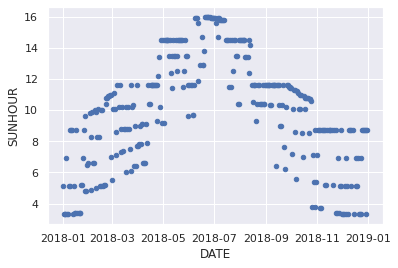

In [122]:
# Draw a scatterplot with Date on X-axis and SUNHOUR on Y-axis

df2018.plot.scatter(x = 'DATE',
                    y = 'SUNHOUR')

#### Propagation
**It seems this is not a good idea to apply the same value all year long...**

You could use the the `method = 'ffill'` or `'bfill'` argument in `fill_na()` to propagate non-null values forward or backward.

In [123]:
# Your code here
df2018['SUNHOUR'].fillna(method = 'ffill',inplace = True)
column_name = 'SUNHOUR'
print("I have " ,df2018[column_name].isna().sum(), "missing values in the column", column_name)

I have  0 missing values in the column SUNHOUR


### 3.4 - Column : OPINION
For Opinion, we have not yet idea. So, we can write a new value 'unknown' in this column.

In [124]:
# Your code here
df2018['OPINION'].fillna('unknown',inplace = True)
df2018['OPINION'].value_counts()

good                91
very bad            82
bad                 79
not good not bad    68
unknown             24
very good           21
Name: OPINION, dtype: int64

## Now, each axis should have 365 non-null values.

In [125]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    365 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C       365 non-null    int64         
 2   MIN_TEMPERATURE_C       365 non-null    int64         
 3   WINDSPEED_MAX_KMH       365 non-null    int64         
 4   TEMPERATURE_MORNING_C   365 non-null    int64         
 5   TEMPERATURE_NOON_C      365 non-null    int64         
 6   TEMPERATURE_EVENING_C   365 non-null    int64         
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64       
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64         
 9   VISIBILITY_AVG_KM       365 non-null    float64       
 10  PRESSURE_MAX_MB         365 non-null    int64         
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64       
 12  HEATINDEX_MAX_C         365 non-null    int64     

## 4 - Visualize your modifications
Draw 4 scatterplots with Date on X-axis, and each of the 4 numeric modified columns on Y-axis :
- The original datas will be in blue
- The new data (your datas) in red

It's the moment to use your "flag" column created at the beginning. It'll be easier in seaborn with `hue` argument.

You should get something like this:

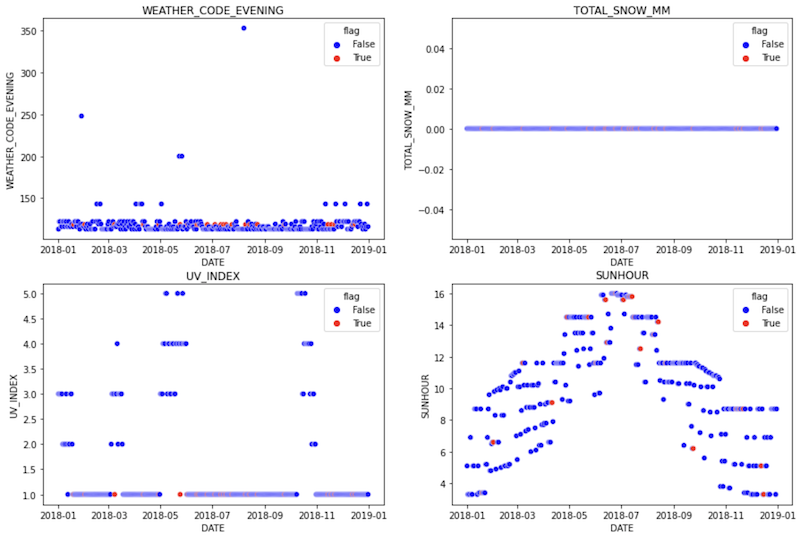

In [126]:
# Your code here
import seaborn as sns
import matplotlib.pyplot as plt


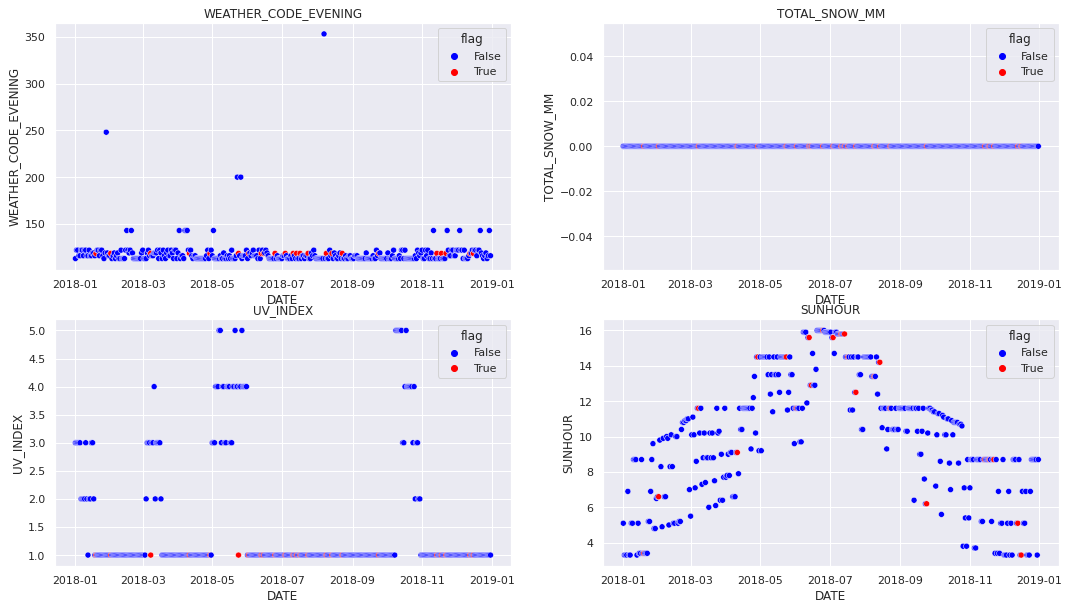

In [127]:
sns.set_theme()
fig, axes = plt.subplots(2,2, figsize=(18, 10))
#1er graph
sns.scatterplot(ax = axes[0,0],
                data = df2018,
                x = 'DATE',
                y = 'WEATHER_CODE_EVENING',
                hue = 'flag',
                palette= sns.color_palette(["blue","red"]))
axes[0,0].set_title('WEATHER_CODE_EVENING')

#2eme graph
sns.scatterplot(ax = axes[0,1],
                data = df2018,
                x = 'DATE',
                y = 'TOTAL_SNOW_MM',
                hue = 'flag',
                palette= sns.color_palette(["blue","red"]))
axes[0,1].set_title('TOTAL_SNOW_MM')

#3eme graph
sns.scatterplot(ax = axes[1,0],
                data = df2018,
                x = 'DATE',
                y = 'UV_INDEX',
                hue = 'flag',
                palette= sns.color_palette(["blue","red"]))
axes[1,0].set_title('UV_INDEX')

#4eme graph
sns.scatterplot(ax = axes[1,1],
                data = df2018,
                x = 'DATE',
                y = 'SUNHOUR',
                hue = 'flag',
                palette= sns.color_palette(["blue","red"]))
axes[1,1].set_title('SUNHOUR')

plt.show()

## MISSION - Apply and Concatenate

In [128]:
#Vérifie que tu as 21 colonnes et 365 lignes, et aucune valeur manquante :
df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    365 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C       365 non-null    int64         
 2   MIN_TEMPERATURE_C       365 non-null    int64         
 3   WINDSPEED_MAX_KMH       365 non-null    int64         
 4   TEMPERATURE_MORNING_C   365 non-null    int64         
 5   TEMPERATURE_NOON_C      365 non-null    int64         
 6   TEMPERATURE_EVENING_C   365 non-null    int64         
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64       
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64         
 9   VISIBILITY_AVG_KM       365 non-null    float64       
 10  PRESSURE_MAX_MB         365 non-null    int64         
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64       
 12  HEATINDEX_MAX_C         365 non-null    int64     

Crée une fonction translate qui traduit chacune des 5 valeurs possibles présente dans OPINION en français. Ta fonction doit prendre un str en paramètre, et retourner un autre str avec la traduction. Par exemple : translate("bad") doit retourner "mauvais". Idem pour very bad, not good not bad, good et very good. Tu peux utiliser un dictionnaire dict, ou bien des conditions imbriquées (le dictionnaire est plus élégant).

In [129]:
def translate(word):
  dico = {'bad' : 'mauvais',
          'very bad' : 'très mauvais',
          'not good not bad' : 'ni bon ni mauvais',
          'good' : 'bon',
          'very good' : 'très bon'}
  return dico[word] if word in dico.keys() else word

print(translate('bad'))
print(translate('hello'))

mauvais
hello


Applique avec apply ta fonction à la Série OPINION, vérifie que ca fonctionne, puis stocke le résultat dans cette même colonne OPINION.

In [130]:
df2018['OPINION'].apply(translate).unique()

array(['mauvais', 'très mauvais', 'unknown', 'ni bon ni mauvais', 'bon',
       'très bon'], dtype=object)

In [131]:
df2018['OPINION'] = df2018['OPINION'].apply(translate)

Utilise apply pour créer une nouvelle colonne MONTH qui contiendra le numéro du mois (de 1 à 12). Tu peux définir une fonction, ou utiliser une fonction lambda.

In [132]:
df2018['MONTH']=df2018['DATE'].apply(lambda date: date.strftime('%m'))

In [133]:
df2018['MONTH']

0      01
1      01
2      01
3      01
4      01
       ..
360    12
361    12
362    12
363    12
364    12
Name: MONTH, Length: 365, dtype: object

Utilise apply pour créer une nouvelle colonne DAY qui contiendra le numéro du jour (de 1 à 31). Tu peux définir une fonction, ou utiliser une fonction lambda.

In [134]:
df2018['DAY']=df2018['DATE'].apply(lambda date: date.strftime('%d'))

In [135]:
df2018['DAY']

0      01
1      02
2      03
3      04
4      05
       ..
360    27
361    28
362    29
363    30
364    31
Name: DAY, Length: 365, dtype: object

Concatène les lignes du DataFrame 2018, avec celles de 2019 (tu as dû l'importer tout en haut de ton notebook).

In [136]:
newDf = pd.concat([df2018 , df_weather], ignore_index=True)
newDf

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY,WEATHER_CODE_MORNING,WEATHER_CODE_NOON
0,2018-01-01 00:00:00,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,mauvais,False,01,01,NaN,NaN
1,2018-01-02 00:00:00,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,mauvais,False,01,02,NaN,NaN
2,2018-01-03 00:00:00,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,mauvais,False,01,03,NaN,NaN
3,2018-01-04 00:00:00,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,mauvais,False,01,04,NaN,NaN
4,2018-01-05 00:00:00,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,mauvais,False,01,05,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,13,10,13,10,12,11,0.0,96,7.375,1033,57.625,13,10,8,116.0,0.0,1.0,8.7,not good not bad,NaN,12,27,119.0,143.0
726,2019-12-28,11,5,12,7,8,8,0.0,93,7.625,1035,39.500,11,9,4,116.0,0.0,1.0,6.9,very bad,NaN,12,28,143.0,116.0
727,2019-12-29,9,2,11,3,6,7,0.0,86,10.000,1034,4.000,9,4,0,116.0,0.0,1.0,8.7,very bad,NaN,12,29,116.0,116.0
728,2019-12-30,12,4,7,5,9,9,0.0,61,10.000,1033,1.875,12,4,4,113.0,0.0,1.0,8.7,very bad,NaN,12,30,113.0,113.0


Utilise apply pour créer une 26e colonne YEAR qui contiendra le numéro de l'année (2018 ou 2019). Tu peux définir une fonction, ou utiliser une fonction lambda.

In [137]:
newDf['DATE']=pd.to_datetime(newDf['DATE'])
newDf['YEAR']=newDf['DATE'].apply(lambda date: date.strftime('%Y'))
newDf['YEAR']

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
725    2019
726    2019
727    2019
728    2019
729    2019
Name: YEAR, Length: 730, dtype: object

Trace les 4 graphiques suivants pour comparer 2018 et 2019 :

Histogramme de la vitesse du vent
Boxplots pour les précipitations
Scatterplots pour le SUNHOUR et la date
Violinplots pour la température maximale

Sur chaque graphique, on pourra lire si 2018 et 2019 sont différents ou similaires, alors utilisez de la couleur pour bien les distinguer !


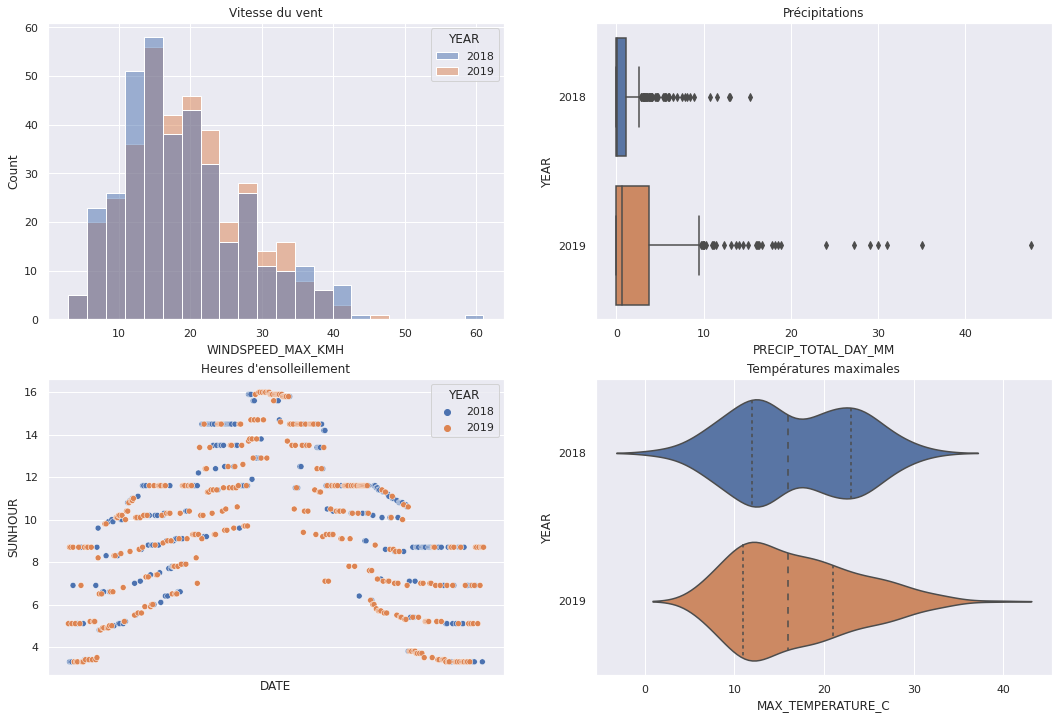

In [143]:
sns.set_theme()
fig, axes = plt.subplots(2,2, figsize=(18, 12))

#1er graph
sns.histplot(ax = axes[0,0],
            data = newDf,
            x = 'WINDSPEED_MAX_KMH',
            hue = 'YEAR')
axes[0,0].set_title('Vitesse du vent')

#2eme graph
sns.boxplot(ax = axes[0,1],
            data = newDf,
            x = 'PRECIP_TOTAL_DAY_MM',
            y = 'YEAR')
axes[0,1].set_title('Précipitations')

#3eme graph
sns.scatterplot(ax = axes[1,0],
                data = newDf,
                x = newDf['DATE'].apply(lambda date: date.strftime('%m-%d')),
                y = 'SUNHOUR',
                hue = 'YEAR')
axes[1,0].set_title("Heures d'ensolleillement")
axes[1,0].set_xticks([])

#3eme graph
sns.violinplot(ax = axes[1,1],
                data = newDf,
                x = 'MAX_TEMPERATURE_C',
                y = 'YEAR',
                inner = "quartile")
axes[1,1].set_title("Températures maximales")

plt.show()

Après l'analyse technique, voici le moment de l'interprétation métier. D'après toi, quelle année a eu la meilleure météo ? 2018 ou 2019 ? Sur quels critères te bases-tu ?


    - plus souvent beaucoup de vent en 2019, plus de précipitations en 2019
    - l'ensoleillement est très similaire entre les 2 années bien qu'il
    semble y avoir plus de jours avec peu d'ensoleillement en 2019, et
    inversement en 2018 (graphique plus orange en bas et plus bleu en haut)
    - pour les températures max, il y a eu plus de jours extrèmement froid
    en 2018 et plus de jours extrèmement chaud en 2019 mais la médiane est
    la même (autant de jours où il a fait moins de 16° environ que de jours
    où il a fait plus de 16° environ les 2 années). Il semble cependant y
    avoir eu légèrement plus de jours où il a fait entre 20 et 30° en 2018,
    ce que je considère comme température idéale.
    
    Je dirais donc que l'année 2018 a eu une meilleure météo